# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [2]:
def has_transitioned(prob):
    r = random.random()
    # YOUR CODE HERE
    if r <= prob:
        return True
    else:
        return False

In [3]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [25]:

def evolveOne(currentState, rules):
    # YOUR CODE HERE
    for i in range(0, len(rules)):
        if currentState == rules[i][0]:
            r = random.random()
            if r <= rules[i][2]:
                return rules[i][1]
            else:
                return currentState
        if currentState != rules[len(rules)-1][0]:
            return currentState
        

In [26]:
evolveOne('A', testRules)

'A'

In [27]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [28]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [234]:
def evolveMany(states, rules):
    newState = []
    # YOUR CODE HERE
    for i in range(0, len(states)):
        newState.append(evolveOne(states[i], rules))
    return newState


In [62]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [235]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A']*NA)+(['B']*NB)+(['C']*NC)
    
    A_count = [NA]
    B_count = [NB]
    C_count = [NC]
    
    evolve = state
    test = ['A', 'B', 'C']
    for i in range(1, n_step+1):
        evolve = evolveMany(evolve, rules)
        no_A= evolve.count('A')
        no_B = evolve.count('B')
        no_C = evolve.count('C')
        A_count.append(no_A)
        B_count.append(no_B)
        C_count.append(no_C)
    
    print(numpy.array(A_count), numpy.array(B_count), numpy.array(C_count))
    return numpy.array(A_count), numpy.array(B_count), numpy.array(C_count)

#needs to be fixed

In [226]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

In [229]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

[200 225 244 253 240 238 230 222 209 200 181 180 171 153 140 126 120 114
 104  98  91] [200 217 232 253 280 299 322 340 359 373 397 406 417 435 450 464 472 480
 490 496 505] [200 158 124  94  80  63  48  38  32  27  22  14  12  12  10  10   8   6
   6   6   4]


AssertionError: 

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




[  0  27  54  77  99 106 113 125 139 147 145 145 140 146 148 146 143 141
 141 145 146 143 142 136 132 131 130 128 127 125 124 118 117 112 112 112
 113 113 111 107 103 101  95  94  90  86  85  83  81  80  81  78  76  73
  72  71  69  67  65  61  60  60  59  58  56  54  54  53  52  51  48  48
  47  43  42  40  39  36  36  35  35  35  35  34  33  30  29  29  28  28
  28  28  28  28  28  27  27  27  25  25  24  24  24  24  23  21  20  20
  19  17  17  16  16  15  14  13  13  12  12  11  10   9   9   9   9   8
   8   7   7   7   7   7   7   7   7   7   6   5   5   5   5   5   4   4
   4   4   4   4   3   1   1   1   1   1   1   1   1   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0] [  0   0   0   2   3   9  11  14  17  21  29  35  44  46  48  50  56  62
  70  72  75  81  82  94 100 103 106 110 112 114 116 122 124 130 130 130
 130 131 134 139 144 146 152 153 157 

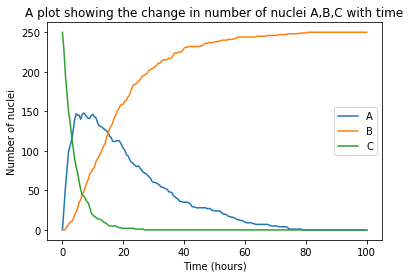

In [231]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
a_nuclei = []
b_nuclei = []
c_nuclei = []
time = numpy.arange(0, 100.5, 0.5)
decay_constant_a = numpy.log(2)/t_half_A
decay_constant_b = numpy.log(2)/t_half_B
decay_constant_c = numpy.log(2)/t_half_C
rules = [['C', 'A', decay_constant_c/2], ['C', 'B', decay_constant_c/2], ['B', 'A', decay_constant_b/2], ['A', 'B', decay_constant_a/2]]

a_nuclei.append(evolve_system(0,0,250, rules, 200)[0])
b_nuclei.append(evolve_system(0,0,250, rules, 200)[1])
c_nuclei.append(evolve_system(0,0,250, rules, 200)[2])


plt.plot(time, numpy.transpose(a_nuclei), label = 'A')
plt.plot(time, numpy.transpose(b_nuclei), label = 'B')
plt.plot(time, numpy.transpose(c_nuclei), label = 'C')
plt.xlabel('Time (hours)')
plt.ylabel('Number of nuclei')
plt.title('A plot showing the change in number of nuclei A,B,C with time')
plt.legend()

#need to check above function and also see if the rules used are correct

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


[  0  18  40  56  75  84  99 104 107 113 121 125 126 123 122 120 116 116
 109 109 107 109 107 105 102  97  93  91  86  85  85  81  78  74  74  71
  71  70  68  66  63  61  58  56  54  54  55  54  51  48  48  47  45  44
  41  39  37  35  34  33  32  29  28  28  25  25  23  23  22  20  20  20
  20  19  19  19  19  18  18  17  15  15  15  15  14  14  13  13  13  13
  13  13  13  13  12  12  12  12  12  12  12  12  11  11  11  11  11  11
  11  10  10  10   9   9   9   9   8   7   7   7   7   7   7   7   7   6
   6   6   6   6   6   6   5   5   5   5   5   5   5   5   5   5   5   5
   5   5   4   4   3   3   3   3   3   3   3   3   3   3   3   2   2   2
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   0   0
   0   0   0] [  0   0   2   3   4  10  11  16  18  20  22  26  32  35  41  45  51  56
  66  69  74  75  80  82  87  92  97  99 104 107 108 113 116 120 121 124
 125 127 129 131 134 136 139 141 143 

[  0  13  27  48  66  78  94  98 107 112 119 128 130 125 127 124 125 124
 121 121 120 117 115 111 103 100  98  92  88  89  83  83  80  72  73  70
  68  65  65  64  61  61  58  57  57  53  51  50  48  48  45  44  42  39
  38  37  35  35  35  33  32  32  32  32  29  28  28  27  25  24  23  22
  21  20  20  19  18  18  17  17  17  17  17  17  16  15  15  14  14  12
  12  12  12  12  12  12  12  12  12  12  11  11  11  11  11  11  11  11
  11  11  11  11  11  11   9   9   9   9   9   9   9   9   8   8   8   6
   6   5   5   5   5   4   4   4   4   4   4   4   4   3   3   3   3   3
   3   3   3   3   3   3   3   3   3   3   3   3   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1] [  0   0   0   1   3   7   8  14  16  20  22  23  30  37  42  47  48  52
  56  60  65  69  72  78  87  92  94 101 105 105 111 111 115 123 125 128
 130 133 134 135 138 139 142 143 143 

[  0  19  41  55  70  82  94 101 109 118 127 134 135 139 137 126 126 125
 120 117 119 118 112 111 104 100  98  93  91  86  86  84  80  79  77  75
  74  73  69  67  65  63  60  57  56  52  50  48  45  44  45  42  40  40
  40  37  36  35  31  32  32  33  33  30  28  28  28  27  27  26  26  24
  22  21  21  21  21  20  19  18  18  17  16  15  15  15  15  13  13  12
  12  11  11  11  11  11  11  10  10   9   9   8   8   7   7   7   7   7
   7   7   6   5   5   5   5   4   4   3   3   3   3   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1   1   1   1
   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0] [  0   0   1   1   4   7   9  12  14  17  20  22  27  30  35  46  49  54
  61  66  69  70  78  81  88  92  94  99 101 106 108 110 114 115 118 120
 121 122 126 128 130 132 135 138 140 

[  0  19  43  54  61  79  87  91  98 107 109 112 111 113 122 127 123 120
 113 115 111 114 116 108 106 104  97  92  89  82  79  77  73  73  72  72
  71  71  69  65  59  58  57  57  53  52  52  49  46  44  44  42  42  42
  40  37  36  36  36  35  35  35  33  31  31  29  29  29  27  27  27  26
  25  24  24  23  23  21  21  21  21  21  21  20  20  19  18  18  18  17
  15  13  12  12  12  12  12  12  12  11  10  10   9   9   9   8   8   8
   8   8   8   8   8   8   7   7   7   6   6   6   6   6   6   6   6   6
   6   6   6   6   6   5   5   4   4   4   4   4   4   4   4   4   4   4
   4   4   3   3   3   3   3   3   3   3   3   3   2   2   2   2   2   2
   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0] [  0   0   0   2   4   7   8  11  15  17  22  26  31  35  38  40  48  55
  68  70  75  75  77  85  87  90  97 102 105 112 115 118 122 123 124 124
 125 127 129 133 139 140 141 141 145 

Text(0.5,1,'A plot showing the uncertainty on the number of nuclei A as a function of time')

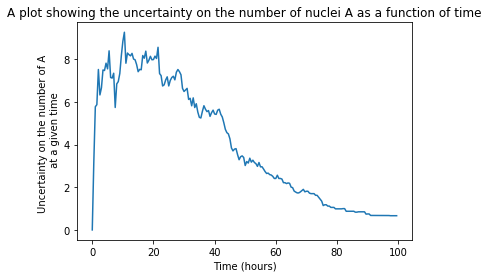

In [232]:
nsim = 20
average_A = numpy.array([])
time = numpy.arange(0, 100, 0.5)
totalA = []
averages = []
error = []
for i in range(0, nsim):
    evolveA, evolveB, evolveC = evolve_system(0, 0, 200, rules, 200)
    totalA.append(evolveA)
for j in range(0, 200):
    temptime = []
    for k in range(0, nsim-1):
        temptime.append(totalA[k][j])
    averages.append(numpy.average(temptime))
    error.append(numpy.std(temptime))

plt.errorbar(time, error)
plt.xlabel('Time (hours)')
plt.ylabel('Uncertainty on the number of A \n at a given time')
plt.title('A plot showing the uncertainty on the number of nuclei A as a function of time')
 
#why do you need an error bar plot for this?